**5,6 Тренд-сезонная модель**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress
from math import sqrt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from scipy.stats import t as student
from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM/')

In [ ]:
data=pd.read_csv('Month_Value_1.csv')
data.tail(40)

In [ ]:
data.Revenue.isna().sum()

32

In [ ]:
df = data.iloc[:60,:2]
df['Period'] = pd.to_datetime(df.Period)

In [ ]:
df = df.set_index('Period')

In [ ]:
df.Revenue = df.Revenue.astype('int')

In [ ]:
df.dtypes

In [ ]:
series = df.squeeze()
series[48:]

In [ ]:
y = series.values
y

In [ ]:
x = np.arange(1,len(y)+1)

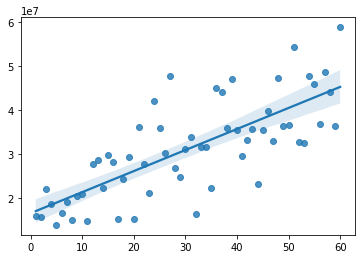

In [ ]:
sns.regplot(x=x,y=y,data=series)

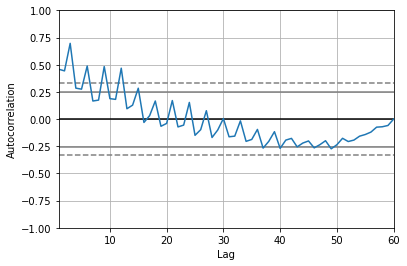

In [ ]:
autocorrelation_plot(y)
plt.show()

In [ ]:
y_train, y_test = y[:48], y[48:]

In [ ]:
x_train, x_test = np.arange(1,len(y[:49])), np.arange(49,len(y)+1)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
series_train = series[:48]
series_train

In [ ]:
series_test = series[48:]
series_test

In [ ]:
rolling_mean=series_train.rolling(window=12).mean() # окно=12, т.к. лаг сезонности = 12
rolling_mean.head(20)

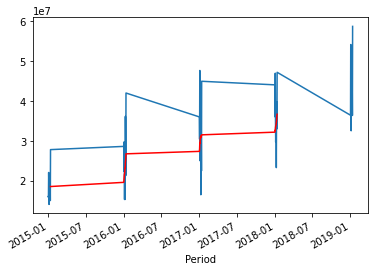

In [ ]:
series.plot()
rolling_mean.plot(color='red') # первых нет потому что окно =12, выпадают, а последних нет, т.к. они ушли в тестовый набор
plt.show()

In [ ]:
X=y_train-rolling_mean # СОДЕРЖИТ СЕЗОННОСТЬ И СЛУЧАЙНОСТЬ
X.head(20)

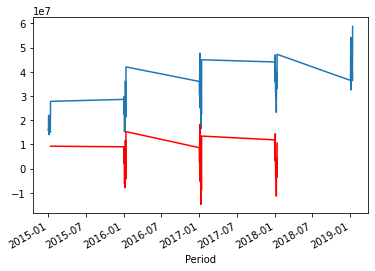

In [ ]:
series.plot()
X.plot(color='red') # первых нет потому что окно =12, выпадают, а последних нет, т.к. они ушли в тестовый набор
plt.show()

In [ ]:
X

In [ ]:
groups=X.groupby(Grouper(freq='A'))
groups.mean()

In [ ]:
years=pd.DataFrame()

In [ ]:
for name, group in groups:
#  print(name.year)
#  print(group.values)
  years[name.year]=group.values

In [ ]:
years

,2015,2016,2017,2018,mean,S
0,NaN,9.032822e+06,8.656268e+06,1.188878e+07,9.859290e+06,7.384045e+06
1,NaN,2.251686e+06,2.376521e+06,3.372923e+06,2.667043e+06,1.917974e+05
2,NaN,8.982264e+06,1.816292e+07,1.440547e+07,1.385022e+07,1.137497e+07
3,NaN,6.799961e+06,-2.389830e+06,2.235758e+06,2.215296e+06,-2.599494e+05
4,NaN,-6.390036e+06,-5.261970e+06,-3.997027e+06,-5.216344e+06,-7.691590e+06
5,NaN,2.097541e+06,3.308908e+05,-6.155374e+05,6.042982e+05,-1.870948e+06
6,NaN,6.338015e+06,2.714842e+06,1.785122e+06,3.612660e+06,1.137414e+06
7,NaN,-7.883813e+06,-1.477803e+07,-1.134059e+07,-1.133414e+07,-1.380939e+07
8,NaN,1.169234e+07,7.916446e+05,4.997951e+05,4.327926e+06,1.852681e+06
9,NaN,2.889600e+06,4.090024e+05,4.219591e+06,2.506065e+06,3.081863e+04


In [ ]:
years['mean']=years.mean(axis=1) # делает столбец в который выводится среднее в строке, т.е. за 3 года
years.shape

(12, 5)

**4. КОРРЕКТИРУЕМ СЕЗОННЫЙ КОЭФФИЦИЕНТ**

In [ ]:
k = years['mean'].mean() # поправочный коэффициент

In [ ]:
k

2475245.865162038

In [ ]:
years['S'] = years['mean'] - k # скорректированный сезонный коэффициент

In [ ]:
s=years['S']

In [ ]:
sez=pd.concat([s for i in range(4)], ignore_index = True)
sez.index=series_train.index
sez # ряд с сезонными составляющими

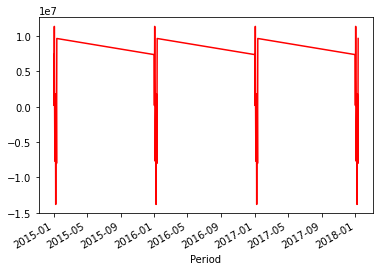

In [ ]:
sez.plot(color='red')
plt.show()

In [ ]:
y_des=y_train - sez # вычлили сезонную составляющую
y_des # это ряд по которому можно строить тренд (т.е. ряд с сезонной составляющей

In [ ]:
series.plot()
y_des.plot(color='red')
y_pred.plot()
plt.show()

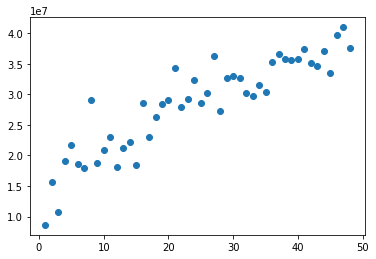

In [ ]:
plt.scatter(x_train,y_des)
plt.show()

In [ ]:
coef=np.polyfit(x_train, y_des, deg=1) # коэффициенты тренда
coef

array([  500293.11578949, 16102778.89232418])

In [ ]:
sss = sez=pd.concat([s for i in range(1)], ignore_index = True)

Прогноз:

In [ ]:
y_pred=coef[0]*x_test+coef[1]+sez # s- это сезонная составляющая, а остальные 2(тренд+случайная) уже включены, на них обучали
y_pred

In [ ]:
R2=r2_score(y_test, y_pred)
R2

0.5716315039249907

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MSE

29073470851686.113

In [ ]:
y_pred=y[len(y_train)-1:len(y)-9]
y_pred

array([47221828, 36459960, 36546498, 54198706])

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MSE

In [ ]:
R2=r2_score(y_test, y_pred) # хороший результат
R2

0.5716315039249907

--------------------------------------------------------------------------------

In [ ]:
y_pred

array([47221828, 36459960, 36546498, 54198706])

In [ ]:
i = pd.Series(index = series.index[48:], data=y_pred.values)
i

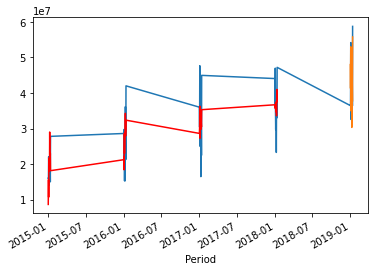

In [ ]:
series.plot()
y_des.plot(color='red')
i.plot()
plt.show()

In [ ]:
y = series.values
y

In [ ]:
x = np.arange(1,len(y)+1)

In [ ]:
coef=np.polyfit(x, y, deg=1) # коэффициенты тренда
coef

array([  476223.12211725, 16678736.65875707])

In [ ]:
sss = sez=pd.concat([s for i in range(1)], ignore_index = True)

Прогноз:

In [ ]:
y_pred=coef[0]*x_test+coef[1]+sez # s- это сезонная составляющая, а остальные 2(тренд+случайная) уже включены, на них обучали
y_pred

# **Строим тренд-сезонную модель на всех данных**

**25.	Постройте на всех данных лучшую модель. Если это тренд-сезонная модель, то см. пп.7-18.**

In [ ]:
series.shape

In [ ]:
rolling_mean=series.rolling(window=12).mean()
rolling_mean.head(20)

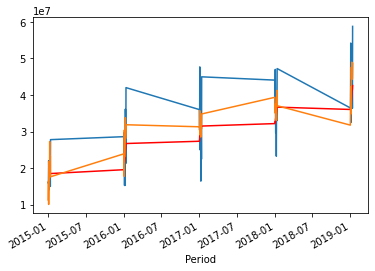

In [ ]:
series.plot()
rolling_mean.plot(color='red')
#X.plot()
y_des.plot()
plt.show()

In [ ]:
X=y-rolling_mean
X.head(20)

Period
2015-01-01             NaN
2015-01-02             NaN
2015-01-03             NaN
2015-01-04             NaN
2015-01-05             NaN
2015-01-06             NaN
2015-01-07             NaN
2015-01-08             NaN
2015-01-09             NaN
2015-01-10             NaN
2015-01-11             NaN
2015-01-12    9.272335e+06
2016-01-01    9.032822e+06
2016-01-02    2.251686e+06
2016-01-03    8.982264e+06
2016-01-04    6.799961e+06
2016-01-05   -6.390036e+06
2016-01-06    2.097541e+06
2016-01-07    6.338015e+06
2016-01-08   -7.883813e+06
Name: Revenue, dtype: float64

In [ ]:
groups=X.groupby(Grouper(freq='A'))

In [ ]:
years=pd.DataFrame()

In [ ]:
for name, group in groups:
  years[name.year]=group.values

In [ ]:
years['mean']=years.mean(axis=1)
years

,2015,2016,2017,2018,2019,mean
0,NaN,9.032822e+06,8.656268e+06,1.188878e+07,4.145763e+05,7.498112e+06
1,NaN,2.251686e+06,2.376521e+06,3.372923e+06,4.572634e+05,2.114598e+06
2,NaN,8.982264e+06,1.816292e+07,1.440547e+07,1.750925e+07,1.476497e+07
3,NaN,6.799961e+06,-2.389830e+06,2.235758e+06,-3.712764e+06,7.332814e+05
4,NaN,-6.390036e+06,-5.261970e+06,-3.997027e+06,-4.161101e+06,-4.952533e+06
5,NaN,2.097541e+06,3.308908e+05,-6.155374e+05,9.812890e+06,2.906446e+06
6,NaN,6.338015e+06,2.714842e+06,1.785122e+06,7.248196e+06,4.521544e+06
7,NaN,-7.883813e+06,-1.477803e+07,-1.134059e+07,-2.949030e+06,-9.237865e+06
8,NaN,1.169234e+07,7.916446e+05,4.997951e+05,7.551667e+06,5.133862e+06
9,NaN,2.889600e+06,4.090024e+05,4.219591e+06,2.825086e+06,2.585820e+06


In [ ]:
k=years['mean'].mean()
k

2796537.0048611113

In [ ]:
years['S']=years['mean']-k
years

,2015,2016,2017,2018,2019,mean,S
0,NaN,9.032822e+06,8.656268e+06,1.188878e+07,4.145763e+05,7.498112e+06,4.701575e+06
1,NaN,2.251686e+06,2.376521e+06,3.372923e+06,4.572634e+05,2.114598e+06,-6.819387e+05
2,NaN,8.982264e+06,1.816292e+07,1.440547e+07,1.750925e+07,1.476497e+07,1.196844e+07
3,NaN,6.799961e+06,-2.389830e+06,2.235758e+06,-3.712764e+06,7.332814e+05,-2.063256e+06
4,NaN,-6.390036e+06,-5.261970e+06,-3.997027e+06,-4.161101e+06,-4.952533e+06,-7.749070e+06
5,NaN,2.097541e+06,3.308908e+05,-6.155374e+05,9.812890e+06,2.906446e+06,1.099093e+05
6,NaN,6.338015e+06,2.714842e+06,1.785122e+06,7.248196e+06,4.521544e+06,1.725007e+06
7,NaN,-7.883813e+06,-1.477803e+07,-1.134059e+07,-2.949030e+06,-9.237865e+06,-1.203440e+07
8,NaN,1.169234e+07,7.916446e+05,4.997951e+05,7.551667e+06,5.133862e+06,2.337325e+06
9,NaN,2.889600e+06,4.090024e+05,4.219591e+06,2.825086e+06,2.585820e+06,-2.107173e+05


In [ ]:
s=years['S']

In [ ]:
sez=pd.concat([s for i in range(5)], ignore_index = True)
sez.index=df.index
sez.head()

Period
2015-01-01    4.701575e+06
2015-01-02   -6.819387e+05
2015-01-03    1.196844e+07
2015-01-04   -2.063256e+06
2015-01-05   -7.749070e+06
Name: S, dtype: float64

In [ ]:
y_des=y-sez
y_des.head()

Period
2015-01-01    1.130850e+07
2015-01-02    1.648953e+07
2015-01-03    1.007871e+07
2015-01-04    2.087784e+07
2015-01-05    2.177055e+07
Name: S, dtype: float64

In [ ]:
t = np.arange(1, len(y_des)+1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
coef=np.polyfit(t, y_des, deg=1)
coef

array([  487712.11598476, 16328322.34579803])

In [ ]:
y_pred=coef[0]*t+coef[1]+sez
y_pred.head()

Period
2015-01-01    2.151761e+07
2015-01-02    1.662181e+07
2015-01-03    2.975990e+07
2015-01-04    1.621592e+07
2015-01-05    1.101781e+07
Name: S, dtype: float64

**26.	Оцените точность модели для всех данных с помощью следующих показателей: коэффициента детерминации, MAE, MSE, RMSE. Соответствующие функции приведены в задании 4. Прокомментируйте полученные результаты.**

In [ ]:
R2=r2_score(y,y_pred)
R2

0.8949810940087419

In [ ]:
MAE=mean_absolute_error(y,y_pred) # низкий показатель, хороший
MAE

2819794.5193754956

In [ ]:
MSE=mean_squared_error(y,y_pred) # низкий показатель, хороший
MSE

12449977458014.467

In [ ]:
RMSE=sqrt(MSE) # низкий показатель, хороший
RMSE

3528452.55856083

**27.	Рассчитайте ошибки модели для всех данных. Поместите столбец ошибок 'Error' в таблицу исходных данных. Выведите на экран первые 5 наблюдений.**

In [ ]:
df['Error']=y-y_pred
df.head()

,Revenue,Error
Period,,
2015-01-01,16010072,-5.507537e+06
2015-01-02,15807587,-8.142209e+05
2015-01-03,22047146,-7.712750e+06
2015-01-04,18814583,2.598668e+06
2015-01-05,14021479,3.003666e+06


**28.	Постройте линейный график ошибок, воспользовавшись функциеями plot() и show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

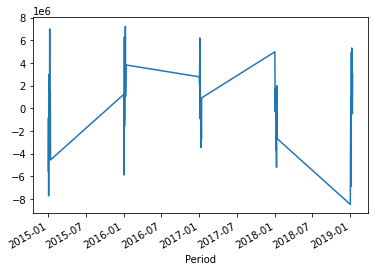

In [ ]:
df.Error.plot()
plt.show()

**29.	Выведите на экран описательные статистики ошибок, воспользовавшись функцией describe(). Прокомментируйте результат.**


In [ ]:
df.Error.describe()

count    6.000000e+01
mean     1.179675e-09
std      3.558229e+06
min     -8.467831e+06
25%     -2.508593e+06
50%      3.540835e+05
75%      2.063236e+06
max      7.233426e+06
Name: Error, dtype: float64

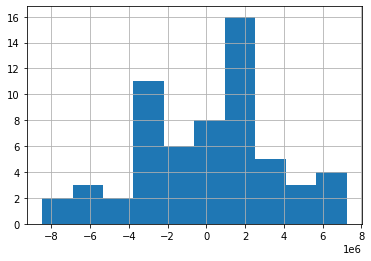

In [ ]:
df.Error.hist()
plt.show()

**30.	Постройте для ошибок гистограмму на основе функции hist(), ядерную оценку плотности на основе функции plot(kind='kde'), Q-Q график на основе функции qqplot() из модуля statsmodels.graphics.gofplots, а также функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

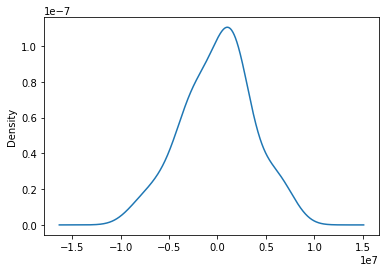

In [ ]:
df.Error.plot(kind='kde')
plt.show()

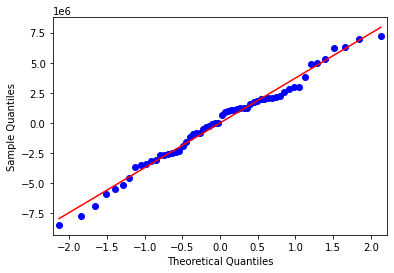

In [ ]:
qqplot(df.Error,line='r')
plt.show()

**31.	Оцените адекватность тренд-сезонной модели на основе теста Дарбина-Уотсона, воспользовавшись функцией durbin_watson() из модуля statsmodels.stats.stattools применительно к остаткам модели. Прокомментируйте результат.**

In [ ]:
d=durbin_watson(df.Error)
d

1.7698496077827814

In [ ]:
4-d

2.230150392217219

n=60, k=1, alfa=0.05. Для n=60 и k=1, alfa=0.05 dl=1.55, du=1.62.
**4-d>du, поэтому гипотеза об отсутствии автокорреляции не отвергается.**

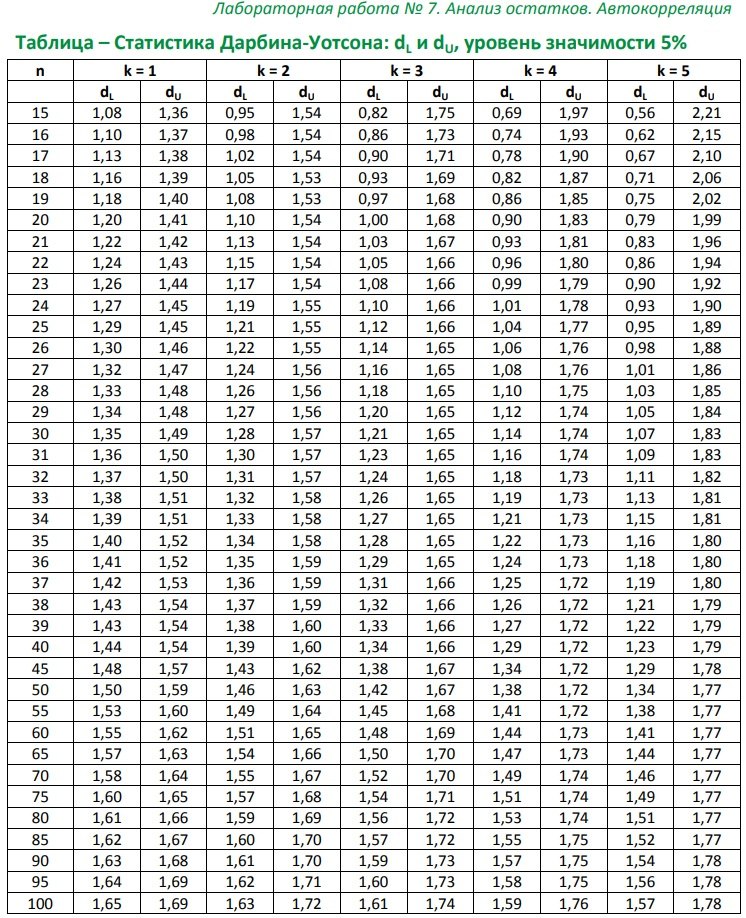

**32.	Постройте для ошибок тренд-сезонной модели коррелограмму, воспользовавшись функцией autocorrelation_plot() из модуля pandas.plotting. Прокомментируйте результат.**

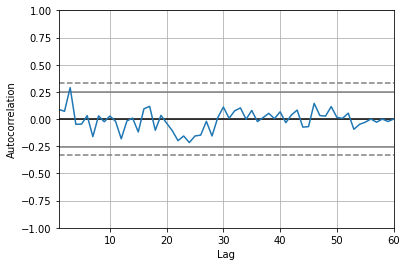

In [ ]:
autocorrelation_plot(df.Error)  # нет автокорреляции, т.к. модель в пределах границ значимости
plt.show()

**33.	На основе переменной y рассчитайте среднее квадратичное отклонение, воспользовавшись функцией sem() из модуля scipy.stats. Запишите результат в переменную sigma и выведите его на экран.**

In [ ]:
sigma =scipy.stats.sem(y)
sigma

1417504.7792056329

**34.	Рассчитайте двусторонний t критерий Стьюдента для существующего объема выборки и 95% достоверности результата (confidence). Воспользуйтесь функцией t.ppf((1 + confidence) / 2., len(y)-1) из модуля scipy.stats. Запишите результат в переменную tstu и выведите его на экран.**

In [ ]:
confidence=0.95

In [ ]:
tstu=scipy.stats.t.ppf((1 + confidence) / 2., len(y)-1)
tstu

2.00099537704821

**35.	Сгенерируйте номера наблюдений для прогнозного интервала, равного 12 месяцев (с 49 по 60 наблюдение). Запишите результат в переменную t_new и выведите его на экран.**

In [ ]:
t_new =np.arange(len(y)+1, len(y)+13)
t_new

array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72])

**36.	Найдите прогнозные значения цены на материал 2 на год вперед (точечный прогноз). Запишите результат в переменную y_new и выведите его на экран.**

In [ ]:
y_new = coef[0]*t_new+coef[1]+s
y_new

0     5.078034e+07
1     4.588453e+07
2     5.902262e+07
3     4.547864e+07
4     4.028054e+07
5     4.862723e+07
6     5.073004e+07
7     3.745834e+07
8     5.231778e+07
9     5.025745e+07
10    4.270301e+07
11    6.159359e+07
Name: S, dtype: float64

**37.	Рассчитайте верхнюю границу прогнозного интервала, воспользовавшись формулой: y_up=y_new+tstu*sigma. Выведите результат на экран.**

In [ ]:
y_up=y_new+tstu*sigma
y_up

0     5.361676e+07
1     4.872096e+07
2     6.185904e+07
3     4.831506e+07
4     4.311696e+07
5     5.146365e+07
6     5.356646e+07
7     4.029477e+07
8     5.515420e+07
9     5.309387e+07
10    4.553943e+07
11    6.443001e+07
Name: S, dtype: float64

**38.	Рассчитайте нижнюю границу прогнозного интервала, воспользовавшись формулой: y_down=y_new-tstu*sigma. Выведите результат на экран.**

In [ ]:
y_down=y_new-tstu*sigma
y_down

0     4.794392e+07
1     4.304811e+07
2     5.618620e+07
3     4.264222e+07
4     3.744412e+07
5     4.579081e+07
6     4.789362e+07
7     3.462192e+07
8     4.948136e+07
9     4.742103e+07
10    3.986659e+07
11    5.875717e+07
Name: S, dtype: float64

**39.	Нанесите на одну диаграмму фактические значения, значения по модели, точечный и интервальный прогнозы, воспользовавшись функциями figure(), scatter(), plot(), xlabel(), ylabel(), legend() и show() из модуля matplotlib.pyplot.**

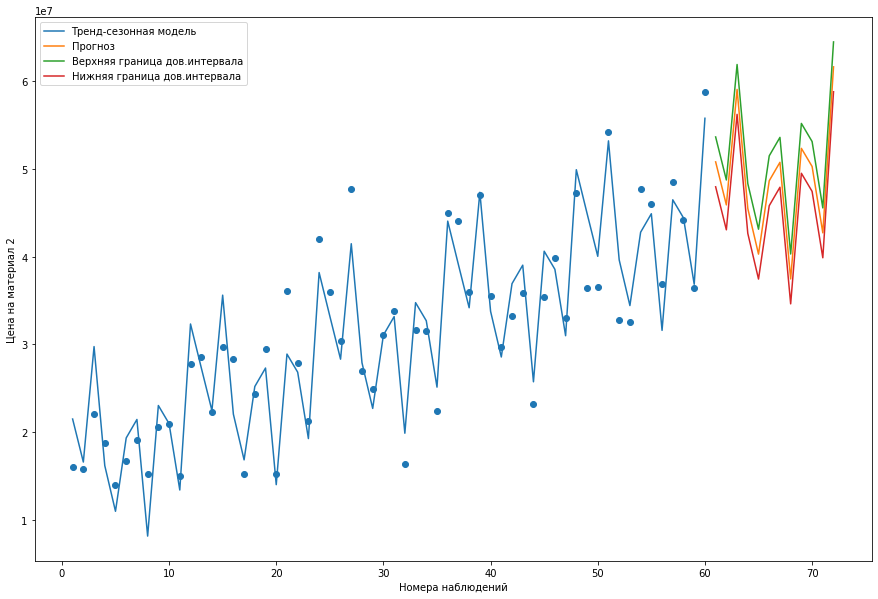

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(t,y)

plt.plot(t,y_pred)
plt.plot(t_new,y_new)
plt.plot(t_new,y_up)
plt.plot(t_new,y_down)

plt.xlabel('Номера наблюдений')
plt.ylabel('Цена на материал 2')
plt.legend(['Тренд-сезонная модель','Прогноз','Верхняя граница дов.интервала','Нижняя граница дов.интервала'])

plt.show()

**40.	Проведите декомпозицию временного ряда с помощью функции seasonal_decompose(series, model='additive') из модуля statsmodels.tsa.seasonal. Результат запишите в переменную result.**

In [ ]:
series.dtypes

dtype('int64')

In [ ]:
result=seasonal_decompose(series, model='additive', period=12)

**41.	Выведите на экран полученный результат с помощью функций plot() и show() из модуля matplotlib.pyplot.**

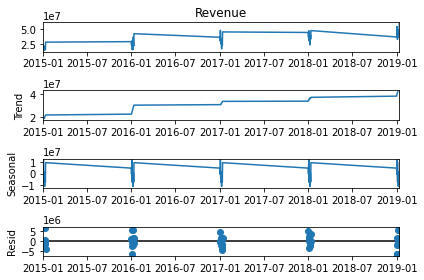

In [ ]:
result.plot() # 1-фактическая составляющая
              # 2-тренд
              # 3-сезонная составляющая
              # 4-ошибки
plt.show()

**42.	Трендовая составляющая содержится в параметре trend. Выведите на экран первые 10 наблюдений.**

In [ ]:
result.trend.head(10)

Period
2015-01-01             NaN
2015-01-02             NaN
2015-01-03             NaN
2015-01-04             NaN
2015-01-05             NaN
2015-01-06             NaN
2015-01-07    1.904412e+07
2015-01-08    1.984208e+07
2015-01-09    2.043587e+07
2015-01-10    2.115369e+07
Name: trend, dtype: float64

**43.	Сезонная составляющая содержится в параметре seasonal. Выведите на экран первые 5 наблюдений.**

In [ ]:
result.seasonal.head()

Period
2015-01-01    4.839506e+06
2015-01-02   -6.177691e+05
2015-01-03    1.218523e+07
2015-01-04   -2.088450e+06
2015-01-05   -7.852689e+06
Name: seasonal, dtype: float64

**44.	Остатки содержатся в параметре resid. Выведите на экран первые 10 наблюдений.**

In [ ]:
result.resid.head(10)

Period
2015-01-01             NaN
2015-01-02             NaN
2015-01-03             NaN
2015-01-04             NaN
2015-01-05             NaN
2015-01-06             NaN
2015-01-07   -9.330597e+05
2015-01-08    6.772460e+06
2015-01-09   -1.276464e+06
2015-01-10   -2.486573e+05
Name: resid, dtype: float64